# 잔차 분석

## 잔차분석의 이해

### `잔차`

`실제 관측값과 예측값의 사이`

즉, 예`측값에 대한 오차`를 의미함

때문에 잔차를 구하기 위해서는 `예측 값을 도출`해야함

$잔차 = 실제관측값 - 예측값$

### 잔차 분석

회귀분석 수행 후 회귀 분석이 적절하게 수행되었는지, `모델이 데이터에 적합한지를 평가`하기 위해 사용

1. 잔차의 선형성
2. 잔차의 정규성
3. 잔차의 등분산성
4. 잔차의 독립성
- Durbuin-Watson 값으로 독립성 확인(1.5 ~ 2.5 사이)

## #01. 작업준비

### 패키지 참조

In [54]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import sys
import os
import statsmodels.api as sm
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_ols

### 그래프 초기화

In [55]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 15)
plt.rcParams["axes.unicode_minus"] = False

### 데이터

In [56]:
df = read_excel("https://data.hossam.kr/E04/cars.xlsx")
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


### `회귀분석` 수행

In [57]:
ols = my_ols(df, x='speed', y='dist')

['speed', 'dist']


## #02. `잔차분석` 수행

### #1-잔차 구하기

#### `예측값`(직접 구하기)

In [58]:
# 독립변수 speed
y = ols.fit.predict(df['speed'])
y

0     -1.849460
1     -1.849460
2      9.947766
3      9.947766
4     13.880175
5     17.812584
6     21.744993
7     21.744993
8     21.744993
9     25.677401
10    25.677401
11    29.609810
12    29.609810
13    29.609810
14    29.609810
15    33.542219
16    33.542219
17    33.542219
18    33.542219
19    37.474628
20    37.474628
21    37.474628
22    37.474628
23    41.407036
24    41.407036
25    41.407036
26    45.339445
27    45.339445
28    49.271854
29    49.271854
30    49.271854
31    53.204263
32    53.204263
33    53.204263
34    53.204263
35    57.136672
36    57.136672
37    57.136672
38    61.069080
39    61.069080
40    61.069080
41    61.069080
42    61.069080
43    68.933898
44    72.866307
45    76.798715
46    76.798715
47    76.798715
48    76.798715
49    80.731124
dtype: float64

#### `예측값`(회귀분석 결과에 내장된 예측값)

`predict()` 함수의 결과와 동일함

In [59]:
y = ols.fit.fittedvalues
y

0     -1.849460
1     -1.849460
2      9.947766
3      9.947766
4     13.880175
5     17.812584
6     21.744993
7     21.744993
8     21.744993
9     25.677401
10    25.677401
11    29.609810
12    29.609810
13    29.609810
14    29.609810
15    33.542219
16    33.542219
17    33.542219
18    33.542219
19    37.474628
20    37.474628
21    37.474628
22    37.474628
23    41.407036
24    41.407036
25    41.407036
26    45.339445
27    45.339445
28    49.271854
29    49.271854
30    49.271854
31    53.204263
32    53.204263
33    53.204263
34    53.204263
35    57.136672
36    57.136672
37    57.136672
38    61.069080
39    61.069080
40    61.069080
41    61.069080
42    61.069080
43    68.933898
44    72.866307
45    76.798715
46    76.798715
47    76.798715
48    76.798715
49    80.731124
dtype: float64

#### `잔차`(직접계산)

$잔차 = 실제관측값 - 예측값$

In [60]:
residual = df['dist'] - y
residual

0      3.849460
1     11.849460
2     -5.947766
3     12.052234
4      2.119825
5     -7.812584
6     -3.744993
7      4.255007
8     12.255007
9     -8.677401
10     2.322599
11   -15.609810
12    -9.609810
13    -5.609810
14    -1.609810
15    -7.542219
16     0.457781
17     0.457781
18    12.457781
19   -11.474628
20    -1.474628
21    22.525372
22    42.525372
23   -21.407036
24   -15.407036
25    12.592964
26   -13.339445
27    -5.339445
28   -17.271854
29    -9.271854
30     0.728146
31   -11.204263
32     2.795737
33    22.795737
34    30.795737
35   -21.136672
36   -11.136672
37    10.863328
38   -29.069080
39   -13.069080
40    -9.069080
41    -5.069080
42     2.930920
43    -2.933898
44   -18.866307
45    -6.798715
46    15.201285
47    16.201285
48    43.201285
49     4.268876
dtype: float64

#### `잔차`(회귀분석 결과에 내장된 잔차값)

In [61]:
residual = ols.fit.resid
residual

0      3.849460
1     11.849460
2     -5.947766
3     12.052234
4      2.119825
5     -7.812584
6     -3.744993
7      4.255007
8     12.255007
9     -8.677401
10     2.322599
11   -15.609810
12    -9.609810
13    -5.609810
14    -1.609810
15    -7.542219
16     0.457781
17     0.457781
18    12.457781
19   -11.474628
20    -1.474628
21    22.525372
22    42.525372
23   -21.407036
24   -15.407036
25    12.592964
26   -13.339445
27    -5.339445
28   -17.271854
29    -9.271854
30     0.728146
31   -11.204263
32     2.795737
33    22.795737
34    30.795737
35   -21.136672
36   -11.136672
37    10.863328
38   -29.069080
39   -13.069080
40    -9.069080
41    -5.069080
42     2.930920
43    -2.933898
44   -18.866307
45    -6.798715
46    15.201285
47    16.201285
48    43.201285
49     4.268876
dtype: float64

#### 분석결과가 내장하고 있는 독립변수 데이터 셋

In [62]:
ols.fit.model.exog

array([[ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  7.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 11.],
       [ 1., 12.],
       [ 1., 12.],
       [ 1., 12.],
       [ 1., 12.],
       [ 1., 13.],
       [ 1., 13.],
       [ 1., 13.],
       [ 1., 13.],
       [ 1., 14.],
       [ 1., 14.],
       [ 1., 14.],
       [ 1., 14.],
       [ 1., 15.],
       [ 1., 15.],
       [ 1., 15.],
       [ 1., 16.],
       [ 1., 16.],
       [ 1., 17.],
       [ 1., 17.],
       [ 1., 17.],
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 19.],
       [ 1., 19.],
       [ 1., 19.],
       [ 1., 20.],
       [ 1., 20.],
       [ 1., 20.],
       [ 1., 20.],
       [ 1., 20.],
       [ 1., 22.],
       [ 1., 23.],
       [ 1., 24.],
       [ 1., 24.],
       [ 1., 24.],
       [ 1., 24.],
       [ 1., 25.]])

##### 분석결과가 내장하고 있는 독립변수 데이터 셋 이름확인 방법

In [63]:
ols.fit.model.exog_names

['Intercept', 'speed']

#### 원본 데이터프레임에 병합

In [64]:
df['예측값'] = y
df['잔차'] = residual
df.head()

,speed,dist,예측값,잔차
0,4,2,-1.849460,3.849460
1,4,10,-1.849460,11.849460
2,7,4,9.947766,-5.947766
3,7,22,9.947766,12.052234
4,8,16,13.880175,2.119825


### #2-`잔차의 선형성`

#### 잔차 시각화

- `모든 예측값`에서 가운데 점선에 맞추어 `잔차가 비슷하게 있어야 한다`.
- 빨간 실선은 `잔차의 추세`를 의미
- `빨간 실선이 점선에서 크게 벗어난다면` 잔차가 크게 달라진다는 의미이므로 `선형성이 없다는 것`이다.

##### 추가 설명

- 추세선은 직선이 기본이기 때문에 분석에 적합하지 않을 수 있음.
- 때문에 lowess 파라미터를 설정해 분석에 용이하도록 시각화 진행. 
- 하지만, 아직 확실한 선형 구간을 도출하기에는 부족함. 때문에 lineplot을 제공해 그래프 분석이 더 용이하도록 변경
- (모든 예측값에서 가운데 점선에 맞춰 잔차가 비슷하게 있어야 한다.
- 붉은 실선은 잔차의 추세를 의미, 붉은 선이 가운데 점선을 벗어날 수록 선형성이 떨어진다.)
- 다만 그래프의 가로 길이를 늘릴 수록 선형/비선형 판단이 힘들어짐.

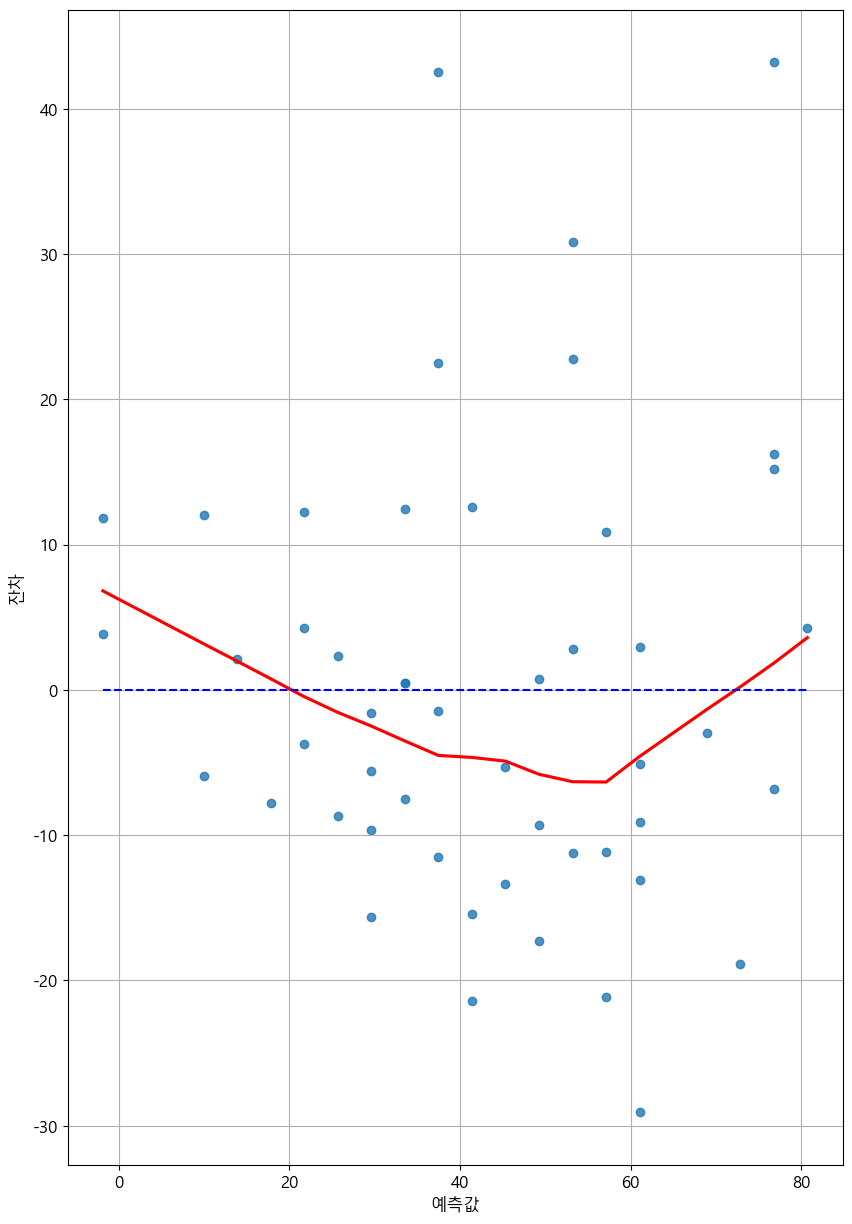

In [65]:
xmin = df['예측값'].min()
xmax = df['예측값'].max()
xrange = [xmin, xmax]
yrange = [0, 0]

plt.figure()
sb.regplot(data=df, x='예측값', y='잔차', lowess=True, line_kws={'color': 'red'})
sb.lineplot(x=xrange, y=yrange, color='blue', linestyle='--')
plt.grid()
plt.show()
plt.close()

### #3-`잔차의 정규성`

- 잔차가 정규분포를 따르는지를 확인

#### 시각화

- `Q-Q plot(분위수대조도)`으로 확인
- `잔차가 정규분포를 따르면` Q-Q Plot에서 `점들이 점선을 따라 배치`된다.
- 구해 놓은 예측값을 활용하여 zscore 값을 구한다.

##### zscore 구하기

In [66]:
df['zscore'] = stats.zscore(df['예측값'])
df.head()

,speed,dist,예측값,잔차,zscore
0,4,2,-1.849460,3.849460,-2.177858
1,4,10,-1.849460,11.849460,-2.177858
2,7,4,9.947766,-5.947766,-1.604738
3,7,22,9.947766,12.052234,-1.604738
4,8,16,13.880175,2.119825,-1.413697


##### Q-Q Plot(분위수대조도) 그리기

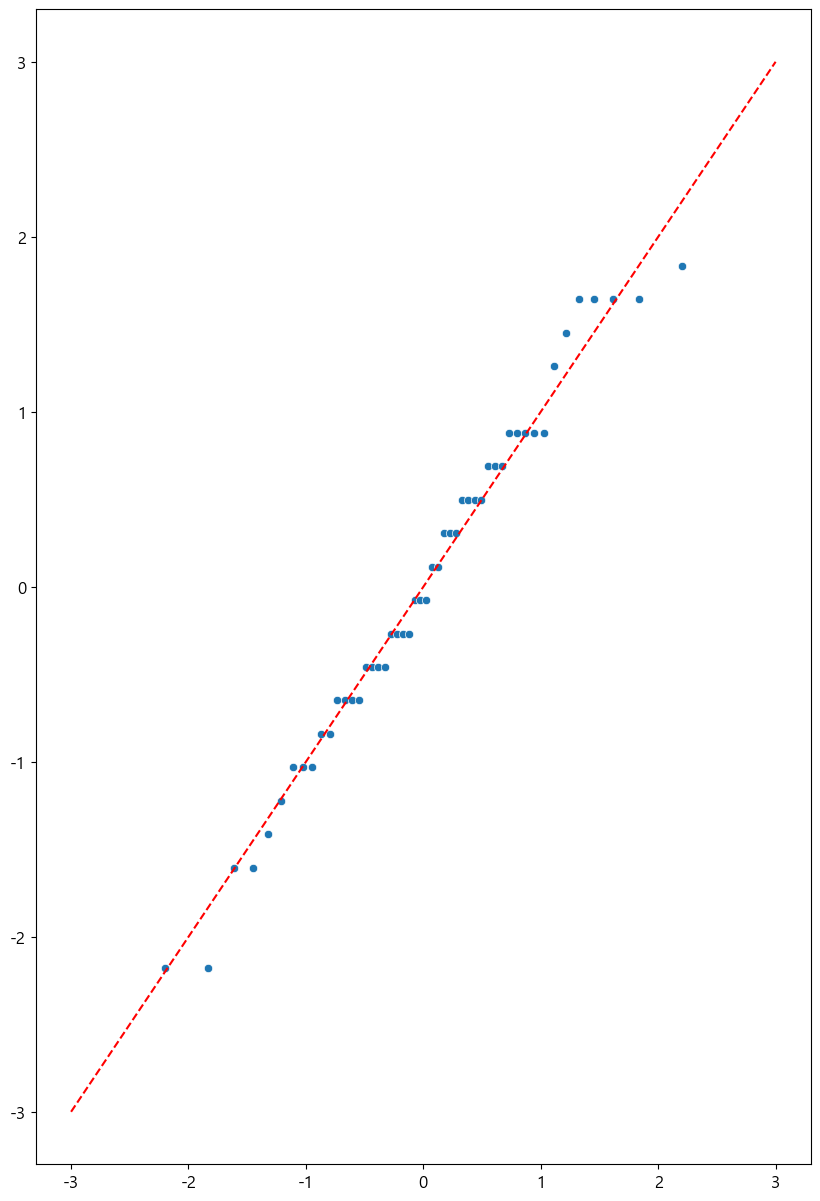

In [67]:
(x, y), _ = stats.probplot(df['zscore'])

sb.scatterplot(x=x, y=y)
sb.lineplot(x=[-3, 3], y=[-3, 3], color='red', linestyle='--')
plt.show()
plt.close()

##### `잔차도`

잔차가 정규분포를 따른다면 대략적

- $\pm\sqrt{MSE}$ 범위 안에 최소 `68%`의 잔차가 포함된다.
- $\pm2\sqrt{MSE}$ 범위 안에 최소 `95%`의 잔차가 포함된다.
- $\pm3\sqrt{MSE}$ 범위 안에 최소 `99%`의 잔차가 포함된다.

ols.fit.mes_resid : 평균 제곱 오차를 사용해 그래프를 그리고 Q-Q Plot보다 자세히 잔차의 정규분포를 판별 가능

In [68]:
MSE_sq = np.sqrt(ols.fit.mse_resid)
r = ols.fit.resid

r1 = r[ (r > -MSE_sq) & (r < MSE_sq)].count() / r.count() * 100
r2 = r[ (r > -2*MSE_sq) & (r < 2*MSE_sq)].count() / r.count() * 100
r3 = r[ (r > -3*MSE_sq) & (r < 3*MSE_sq)].count() / r.count() * 100

mse_r = [r1, r2, r3]

print(f"루트 1MSE 구간에 포함된 잔차 비율: {r1:1.2f}%")
print(f"루트 2MSE 구간에 포함된 잔차 비율: {r2:1.2f}%")
print(f"루트 3MSE 구간에 포함된 잔차 비율: {r3:1.2f}%")

루트 1MSE 구간에 포함된 잔차 비율: 74.00%
루트 2MSE 구간에 포함된 잔차 비율: 94.00%
루트 3MSE 구간에 포함된 잔차 비율: 100.00%


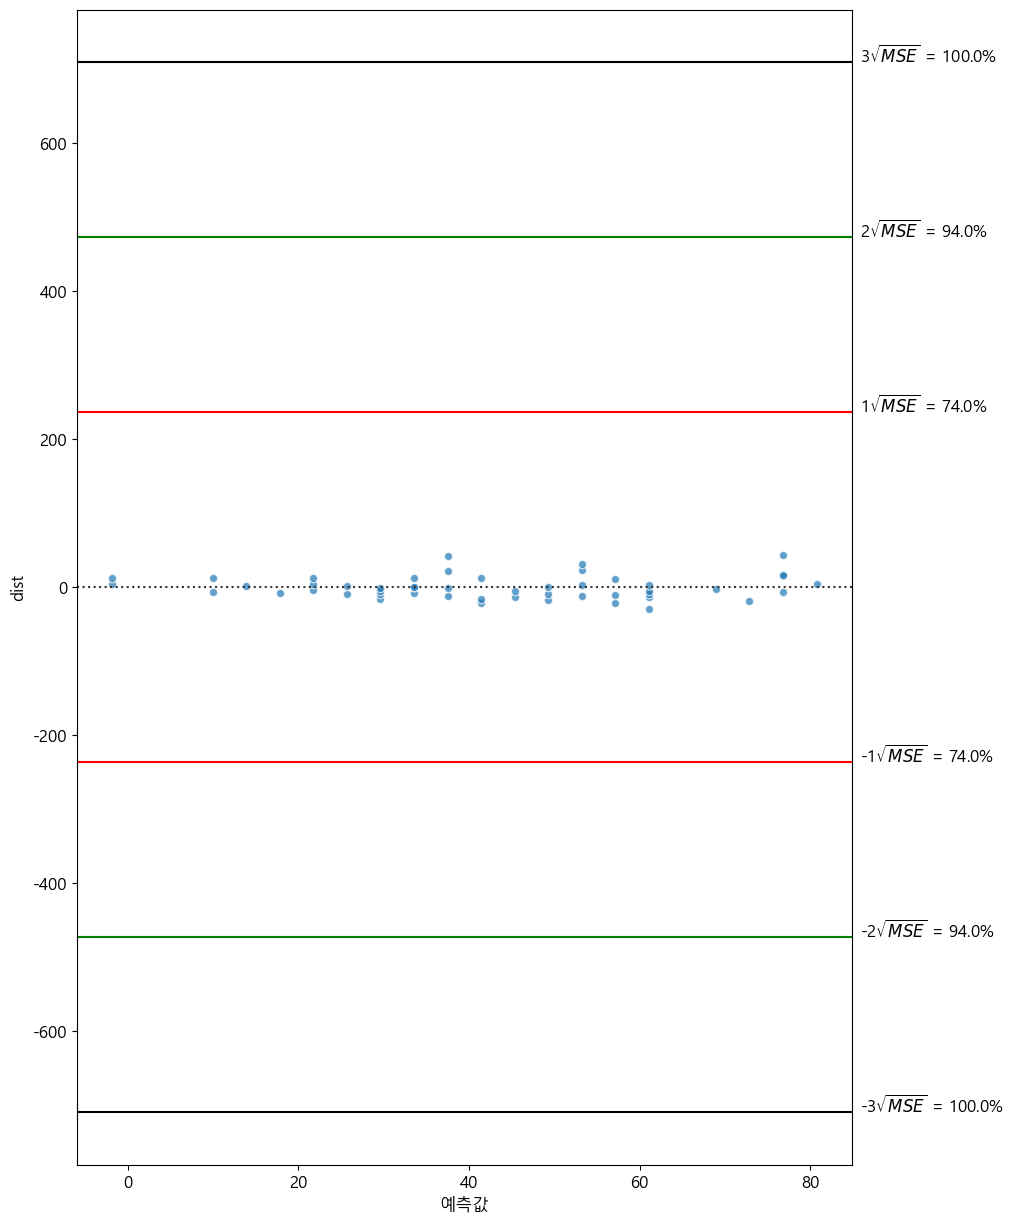

In [69]:
# ols.fit.mes_resid
# 평균 제곱 오차를 사용해 그래프를 그리고 
# Q-Q Plot보다 자세히 잔차의 정규분포를 판별 가능

# 선형 회귀 모델(OLS 모델)로부터 
# Mean Squared Error (MSE)의 제곱 값을 담는 변수
mse_sq = ols.fit.mse_resid


# 예측값과 실제값간의 잔차를 구해서 표시해주는 그래프
sb.residplot(data=df, x='예측값', y='dist', scatter_kws = {'edgecolor':"white", "alpha":0.7})

# 반복문으로 잔차도 생성(MSE)
for i, c in enumerate(['red', 'green', 'black']):
    plt.axhline((i+1) * mse_sq, color=c)
    plt.axhline(-(i+1) * mse_sq, color=c)

# 현재 표시되는 그래프의 x축 범위를 가져온다.
xmin, xmax = plt.xlim()

# MSE 값 그래프에 시각화(위치는 범례처럼 수동으로 설정)
for i, c in enumerate(['red', 'green', 'black']):
    plt.text(s=f"{i+1}"r'${}\sqrt{MSE}$ = %s%%' % mse_r[i], x=xmax+1, y=(i+1) * mse_sq)
    plt.text(s=f"-{i+1}"r'${}\sqrt{MSE}$ = %s%%' % mse_r[i], x=xmax+1, y=-(i+1) * mse_sq)

plt.show()
plt.close()

#### `샤피로 검정`을 통한 `정규성 검정`

| 가설 | 내용 |
|--|--|
| 귀무가설 | 표본의 모집단이 정규분포를 따름 |
| 대립가설 | 표본의 모집단이 정규분포를 따르지 않음 |

In [70]:
s, p = stats.shapiro(df['잔차'])
print("Shapiro-Wilk Test: (통계량, p-value) = ", (s,p))

"잔차가 정규성을 따름" if p>0.05 else "잔차가 정규성을 따르지 않음"

Shapiro-Wilk Test: (통계량, p-value) =  (0.9450908899307251, 0.02152523212134838)


'잔차가 정규성을 따르지 않음'

### #4-`잔차의 등분산성`
- 회귀모형을 통해 예측된 모든 값들에 대하여 `잔차의 분산이 동일하다는 가정`

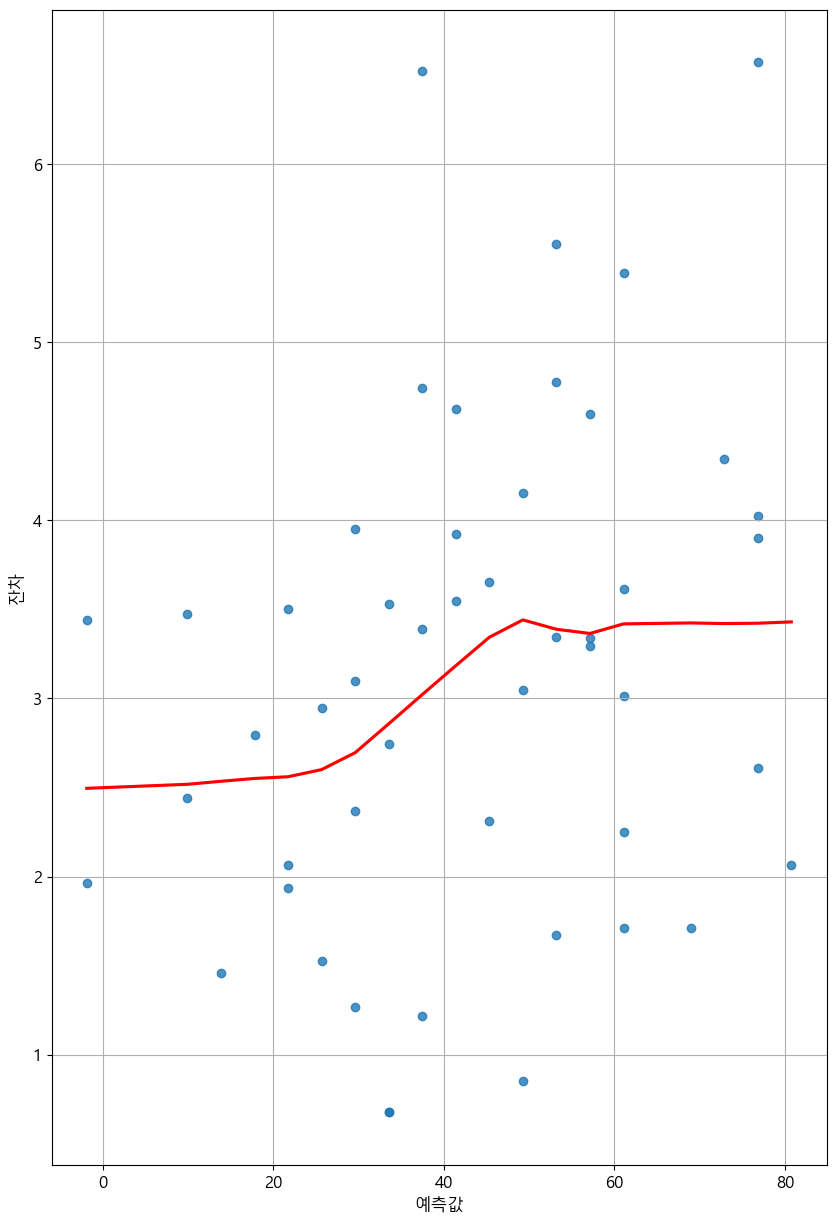

In [71]:
sb.regplot(x=df['예측값'], y=np.sqrt(np.abs(df['잔차'])), lowess=True, line_kws = {'color':'red'})
plt.grid()
plt.show()
plt.close()

#### 브로이슈-패건 검정

| 가설 | 설명 |
|---|---|
| 귀무가설 | 등분산성 가정이 만족된다 (오차의 분산은 독립변수들과 관련이 없다) |
| 대립가설 | 등분산성 가정이 만족되지 않는다(오차의 분산은 독립변수들과 관련이 있다) |

In [72]:
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test_result = het_breuschpagan(ols.fit.resid, ols.fit.model.exog)
DataFrame(test_result, index=names)

,0
Lagrange multiplier statistic,3.214880
p-value,0.072972
f-value,3.298361
f p-value,0.075597


### #5-`잔차의 독립성`

회귀분석 결과표 하단의 Dubin-Watson 값을 확인한다.

| 수치 | 해석 |
|---|---|
| `0` | 잔차들이 양의 상관 관계 (독립성 `X`) |
| `2` | 잔차들이 독립. |
| `4` | 잔차들이 음의 상관 관계 (독립성 `X`) |

일반적으로 DW값이 `1.5 ~ 2.5` 범위에 있으면 독립으로 판정

In [73]:
ols.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.49e-12
Time:                        14:29:53   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
durbin_watson(df['잔차'])

1.6762253234350974